## Entity modeling

The second part of data modeling is identifying relationship of our data model. 

## 2. Relationship modeling

After identifying entities in our data, we can work on the links between them.

Types of relationships betwen entities: 
- 1-to-1
	- `"title": "stars wars",`
- 1-to-n
	- `"cast": [{"actor": "asdasd", "character": "asdas"}, ...]`
- m-to-n
	- embedding: tale related data and insert it into our document
	- referencing: refer to documents in another collection in our document

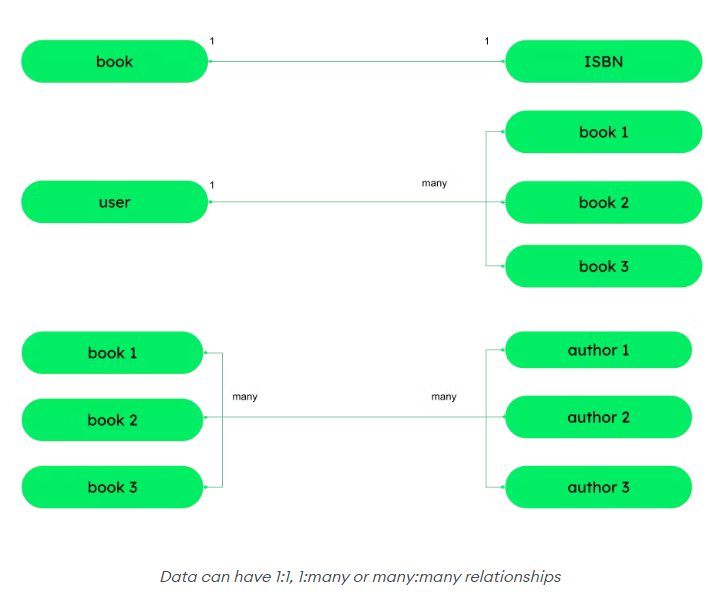

In [ ]:
// 1-to-1 relationship

{
    "_id": 1,
    "title": "Star Wars",
    "director": {
        "name": "George Lucas",
        "birthDate": "May 14, 1944"
    }
}

// 1-to-many relationship
// One movie has many cast members

{
    "_id": 1,
    "title": "Star Wars",
    "cast": [
        {
            "actor": "Mark Hamill",
            "character": "Luke Skywalker"
        },
        {
            "actor": "Carrie Fisher",
            "character": "Princess Leia"
        },
        // ... other cast members
    ]
}


## m-to-n relationship: embeddings and referencings

- embedding data in document
	- also known as "nested documents"
		- often relationship types - 1-to-N, M-to-N
	- advantages
		- embedding simplifies queries:
			- as it avoid application "joins (refer to relational database joins)"
		- provide better performance for read operations
			- enable you to store all kinds of related information in a single document
	- warning:
		- embedding data into a single document can create large documents, which can lead to excessive memory and add latency for reads
		- "unbounded document" -- exceeding the BSON document threshold of 16MB.

- referencing data in documents
	- also called 'linking' or 'data normalization'
	- when we store data in two different collections, but also ensure 2 collections are related, we can use references. 
	- it saves `_id` field of one document in another document as a link between the two
	- simple and sufficient for most use cases
	- advantages
		- no duplication of data
		- smaller documents
	- limitation
		- you need query multiple documents, cost extra resources and impacts read performance

In [ ]:
## embedding
## We put sub-documents within documents

{
    "_id": 1,
    "title": "Star Wars",
    # Here we have a list of sub-documents: 
    "relatedTales": [
        {
            "title": "The Empire Strikes Back",
            "year": 1980
        },
        {
            "title": "Return of the Jedi",
            "year": 1983
        }
        // ... other related tales
    ]
}



In [ ]:
## referencing

## Movie Collection Document
{
    "_id": 1,
    "title": "Star Wars",
    # Here, we put a list of ObjectIds that reference the related tales, to avoid putting much detail in the Movie Collection Document
    "relatedTales": [
        ObjectId("taleId1"),
        ObjectId("taleId2")
        // ... other related tale ObjectIds
    ]
}

## Tale Collection Document
{
    "_id": ObjectId("taleId1"),
    "title": "The Empire Strikes Back",
    "year": 1980
}

{
    "_id": ObjectId("taleId2"),
    "title": "Return of the Jedi",
    "year": 1983
}


Here, we demonstrate how to create separate collections for "tales" and "movies"

Step 1: Create collections for "tales"

In [ ]:
db.createCollection("tales");

db.tales.insertMany([
  {
    "_id": ObjectId("taleId1"),
    "title": "The Empire Strikes Back",
    "year": 1980
  },
  {
    "_id": ObjectId("taleId2"),
    "title": "Return of the Jedi",
    "year": 1983
  }
  // ... other tales documents
]);

Step 2: Create collection for "movies"

In [ ]:
db.createCollection("movies");

db.movies.insertOne({
  "_id": 1,
  "title": "Star Wars",
  "relatedTales": [
    ObjectId("taleId1"),
    ObjectId("taleId2")
    // ... other related tale ObjectIds
  ]
});

Step 3: Aggregate information from `tales` collections when finding documents in `movies` collection

(We will cover `.aggregate()` method in detail in lecture 6.)

In [ ]:
db.movies.aggregate([
  {
    $lookup: {
      from: "tales",
      localField: "relatedTales",
      foreignField: "_id",
      as: "tales_info"
    }
  }
]);